In [1]:
from datasets import load_dataset
from datasets import Dataset, Image
from glob import glob
from tqdm import tqdm
import linecache
import json
import mp
import os

In [2]:
text_file = open('vehicles.txt', 'r')
lines = text_file.readlines()
keyword_list = list(dict.fromkeys(lines))

In [3]:
results = []
for no, keyword in enumerate(keyword_list):
    filename = f'data/generated-vehicle/{no}.jsonl'
    results.append((keyword, filename))

In [4]:
from tqdm import tqdm

def loop(files):
    files, _ = files
    results = []
    for file in files:
        keyword, file = file
        keyword = keyword.strip()
        index = file.split('/')[-1].replace('.jsonl', '')
        with open(file) as fopen:
            i = 0
            for l in tqdm(fopen):
                try:
                    l = json.loads(l)
                except:
                    i += 1
                    continue
                filename = os.path.join('image-vehicle', f'{index}-{i}.jpeg')
                if not os.path.exists(filename):
                    i += 1
                    continue
                    
                l.pop('image_base64', None)
                    
                l['filename'] = filename
                l['image'] = filename
                l['keyword'] = keyword
                    
                results.append(l)
                
                i += 1
                
    return results

In [5]:
r = mp.multiprocessing(results, loop, cores = 30, returned = True)

32it [00:00, 23976.01it/s]
557it [00:00, 86058.40it/s]
0it [00:00, ?it/s]
502it [00:00, 83510.12it/s]

464it [00:00, 73785.15it/s]
227it [00:00, 71174.93it/s]
0it [00:00, ?it/s]9.37it/s]
535it [00:00, 71808.78it/s]
148it [00:00, 58188.69it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]4.19it/s]
0it [00:00, ?it/s]5.59it/s]
0it [00:00, ?it/s]





94it [00:00, 42660.09it/s]

0it [00:00, ?it/s]6.90it/s]

663it [00:00, 73169.94it/s]

0it [00:00, ?it/s]1.84it/s]
160it [00:00, 28756.42it/s]
554it [00:00, 52693.93it/s]

681it [00:00, 54613.12it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s].78it/s]]
614it [00:00, 46403.52it/s]
0it [00:00, ?it/s]
750it [00:00, 50446.26it/s]


109it [00:00, 41512.68it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]0.27it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]0.41it/s]
3it [00:00, 22712.84it/s]s]
31it [00:00, 18154.62it/s]]
561it [00:00, 50937.45it/s]

0it [00:00, ?it/s]5.51it/s]
551it [00:00, 57726.03it/s]
455it [00:00, 58284.47it/s]
516it 

In [6]:
len(r)

778295

In [7]:
dataset = Dataset.from_list(r)
dataset = dataset.cast_column("image", Image())
dataset

Dataset({
    features: ['alt_text', 'parent_href', 'filename', 'image', 'keyword'],
    num_rows: 778295
})

In [10]:
dataset[0]

{'alt_text': '2020 Volkswagen Polo 1.6L Comfortline ...',
 'parent_href': '/imgres?q=2020%20Volkswagen%20Polo%201.6L%20Comfortline&imgurl=https%3A%2F%2Fimages.wapcar.my%2Ffile1%2Fa8c5626135a946e78613a7a6b6c56432_1125x630.jpg&imgrefurl=https%3A%2F%2Fwww.wapcar.my%2Fcars%2Fvolkswagen%2Fpolo%2F2020-1.6l-comfortline-join&docid=saLOsiQ75U-_ZM&tbnid=PvKTEgiJzSVpTM&vet=12ahUKEwjLlsz9h7-FAxXzFlkFHYCDAwcQM3oECBcQAA..i&w=930&h=620&hcb=2&ved=2ahUKEwjLlsz9h7-FAxXzFlkFHYCDAwcQM3oECBcQAA',
 'filename': 'image-vehicle/0-0.jpeg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=930x620>,
 'keyword': '2020 Volkswagen Polo 1.6L Comfortline'}

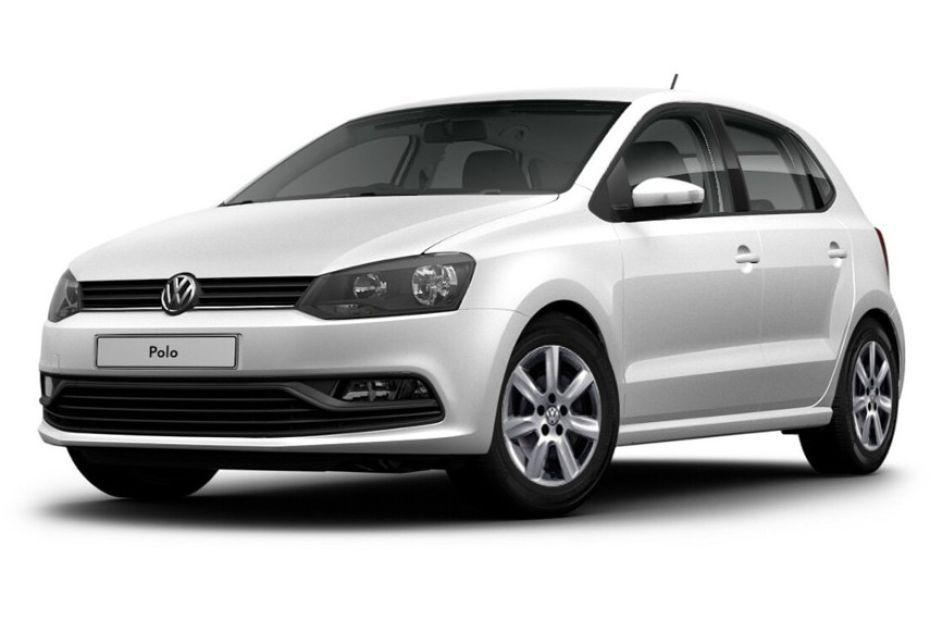

In [8]:
dataset[0]['image']

In [9]:
dataset[-1]

{'alt_text': '2020 Triumph Street Triple RS 765 Test ...',
 'parent_href': '/imgres?q=Triumph%20Street%20Triple%20765RS%20(2020)&imgurl=https%3A%2F%2Fi.ytimg.com%2Fvi%2FSf9bMa6-IrA%2Fmqdefault.jpg&imgrefurl=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DSf9bMa6-IrA&docid=JOY9VDY5RXFr-M&tbnid=cdYzk36Wz-zyPM&vet=12ahUKEwjp4NP4gMWFAxWjfTABHdz4AmQ4PBAzegQIHhAA..i&w=320&h=180&hcb=2&itg=1&ved=2ahUKEwjp4NP4gMWFAxWjfTABHdz4AmQ4PBAzegQIHhAA',
 'filename': 'image-vehicle/1753-661.jpeg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x180>,
 'keyword': 'Triumph Street Triple 765RS (2020)'}

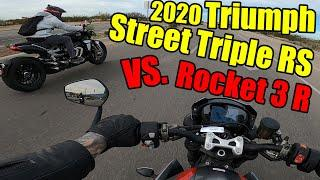

In [11]:
dataset[-1]['image']

In [12]:
dataset[100001]

{'alt_text': 'Nissan Juke DIG-T 114 hv aut. N ...',
 'parent_href': '/imgres?q=2023%20Nissan%20Juke%20N-Connecta%201.0L%20DIG-T%20114&imgurl=https%3A%2F%2Fimages.nettiauto.com%2Flive%2F2023%2F07%2F28%2F1cf8deb87c525a47-large.jpg&imgrefurl=https%3A%2F%2Fm.nettiauto.com%2Fen%2Fnissan%2Fjuke%2F13743154&docid=mCaEx5y1UpXTwM&tbnid=J77apm6hBdKXaM&vet=12ahUKEwiEnuL3qL-FAxXEFVkFHYcLBA84HhAzegQILBAA..i&w=1440&h=1080&hcb=2&itg=1&ved=2ahUKEwiEnuL3qL-FAxXEFVkFHYcLBA84HhAzegQILBAA',
 'filename': 'image-vehicle/305-272.jpeg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1080>,
 'keyword': '2023 Nissan Juke N-Connecta 1.0L DIG-T 114'}

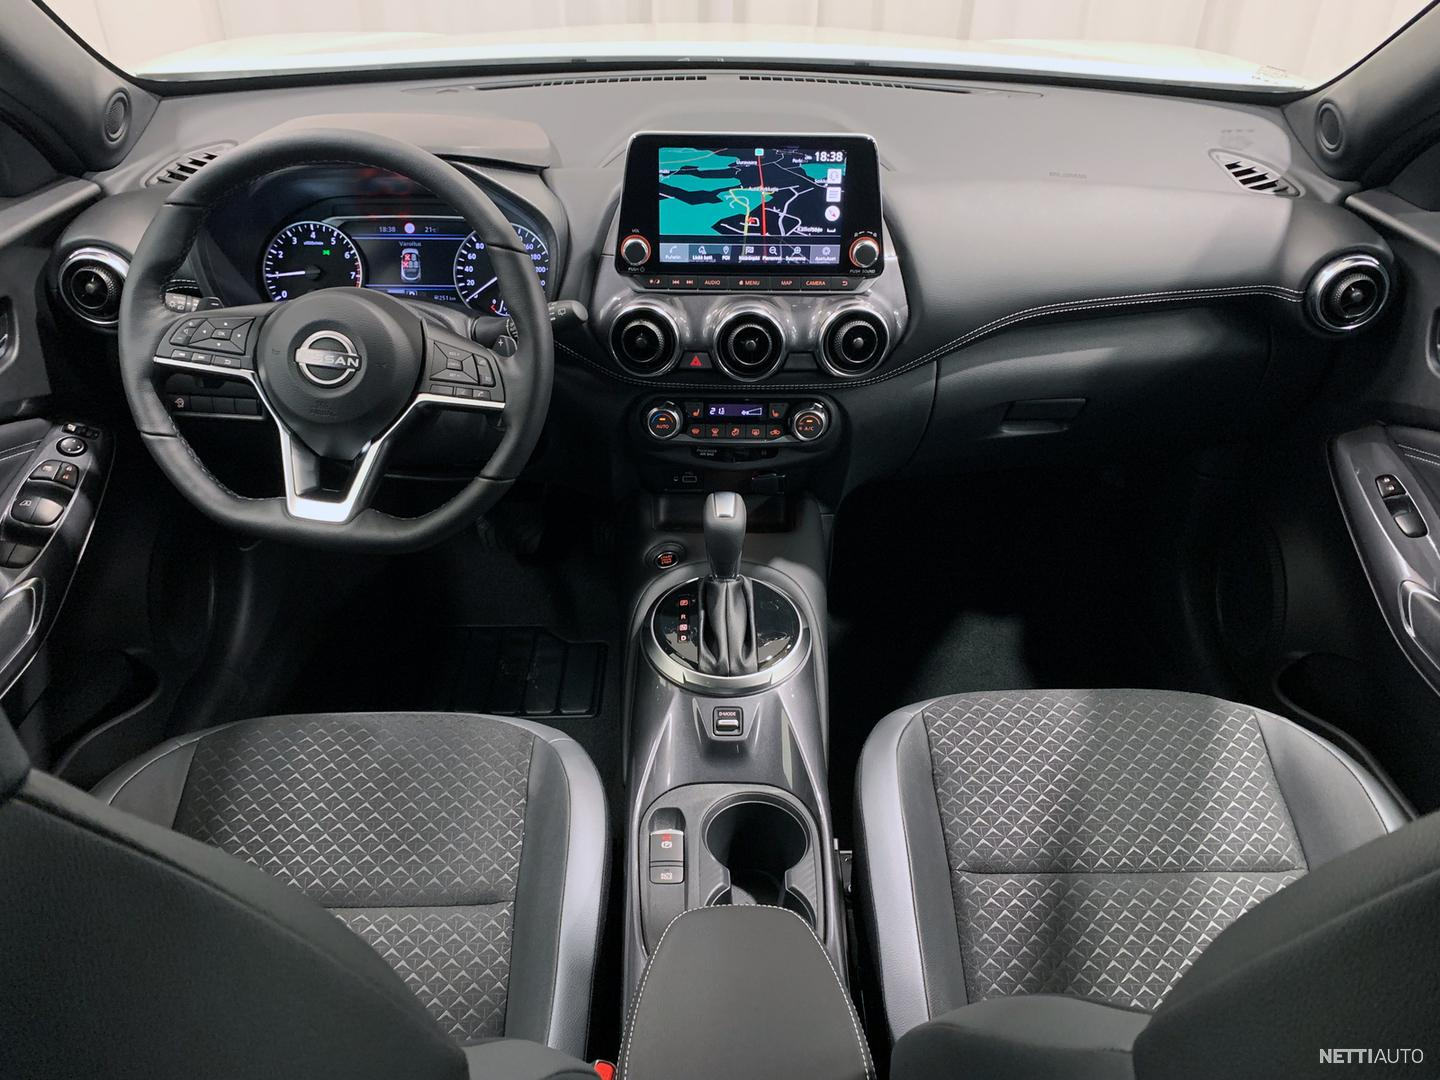

In [13]:
dataset[100001]['image']

In [15]:
import time

while True:
    try:
        dataset.push_to_hub(repo_id = 'malaysia-ai/crawl-google-image-malaysian-car')
    except Exception as e:
        print(e)
        pass
    
    time.sleep(60 * 60)